#**1. Mount The drive:**  
*Click on the Files option in the left pannel, select the Mount drive option to access the contents of your drive.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Installing packages

In [2]:
!pip install sunpy[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.4/966.4 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

## **4. Loading SJI Images**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sunpy
import sunpy.map
from IPython.display import HTML

In [4]:
# Open the saved FITS file
file_path = '/content/drive/MyDrive/NIUS/iris_sji_1330map.fits'
with fits.open(file_path) as hdul:
    hdul.info()  # Check the structure
    # Retrieve the data and header
    sji_data = hdul[0].data
    sji_header = hdul[0].header
print(f"Data shape: {sji_data.shape}")
print(sji_header)

sji_map = sunpy.map.Map(file_path)
sji_map.peek()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/NIUS/iris_sji_1330map.fits'

In [ ]:
#Making animation
with fits.open('/content/drive/MyDrive/NIUS/iris_sji_1330map.fits') as hdu:
    data_1330 = hdu[0].data
    header = hdu[0].header
print(repr(header))

#Priting a keyword of the header
print(header['CDELT1'],header['CDELT2'],header['CDELT3'])
# 2. Create MapSequence (Subset of 50 frames for speed)
maps = [sunpy.map.Map(data_1330[i], header) for i in range(200)]
sequence = sunpy.map.MapSequence(maps)
# 3. Create Animation
# sequence.plot() returns a matplotlib FuncAnimation object
vmin = np.nanpercentile(data_1330, 1)
vmax = np.nanpercentile(data_1330, 95)
print(vmin,vmax)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1091                                                  
NAXIS2  =                 1093                                                  
NAXIS3  =                  200                                                  
DATE    = '2017-06-02'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SJI     '           /                                                
DATA_LEV=              2.00000 /                                                
LVL_NUM =              2.000

In [ ]:
for i in range(10):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.imshow(data_1330[15+i,:,:], origin='lower', vmin=0,vmax=1000)

# **Inspection of a raster IRIS Level 2 data file**

**Importing Required Packages**

In [ ]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
from astropy.io import fits
from scipy.constants import c
from scipy.interpolate import interp1d
import glob
from astropy.wcs import WCS     #to plot coordinate and wavelength
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import curve_fit

# **Visualizing and selecting raster IRIS Level 2 data**

**Reading Raster file in a data cube for O I 1356 Window**

In [ ]:
## Retreiving data
data = np.load('/content/drive/MyDrive/NIUS/spectrum_data.npz')
print("Arrays stored inside found:", data.files)
spectrum_data_array = data['spectrum_data']
wavelength = data['wavelength']
print("spectrum_data:", spectrum_data_array.shape)
print("wavelength:", wavelength.shape)
data.close()


Arrays stored inside found: ['wavelength', 'spectrum_data']
spectrum_data: (30, 8, 1093, 141)
wavelength: (141,)


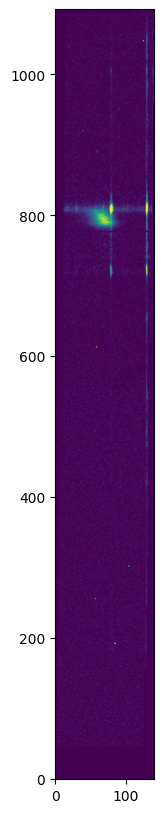

In [ ]:
## Plotting the spectral window data
plt.figure(figsize=(10,10))
plt.imshow(spectrum_data_array[0,5,:,:], origin='lower',vmin=0,vmax=100)
plt.show()

**Plotting the Spectrum for the pixel 805 in the Y-axis**

(141,)


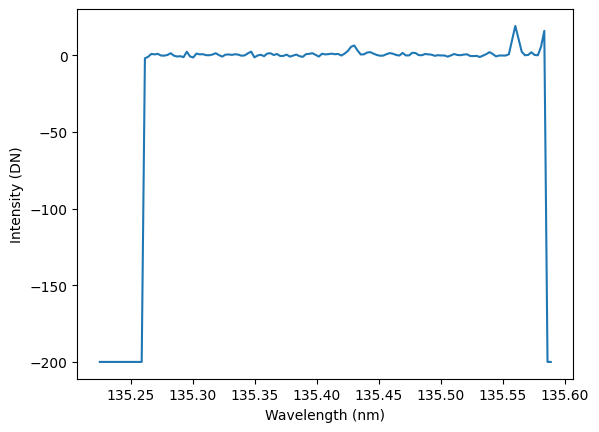

In [ ]:
#wavelength=o1_wave.to("nm")
data_5=spectrum_data_array[0,5,990:1000,:].mean(0)
print(wavelength.shape)
plt.plot(wavelength,data_5)
#plt.plot(wavelength[15:135],data_5[15:135])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.show()

**Plotting Average Spectrum of the flare ribbons**

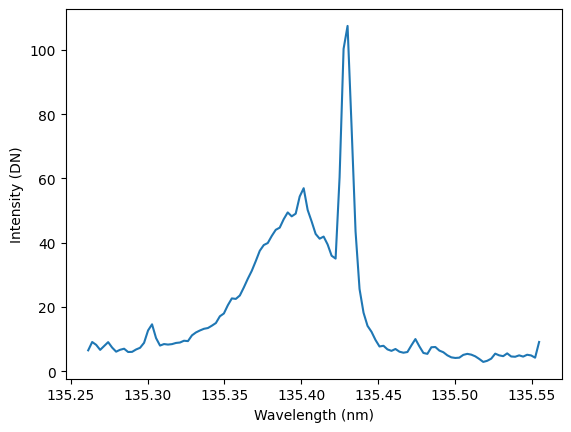

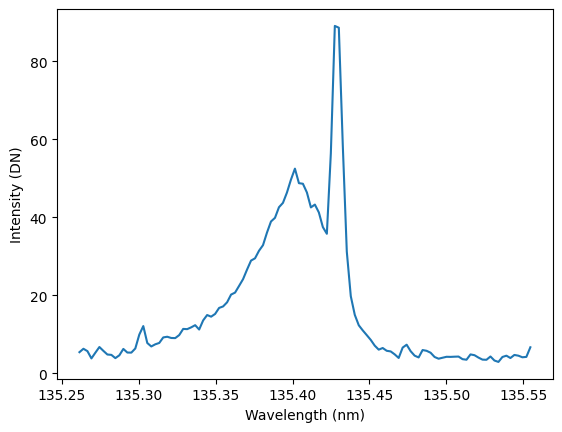

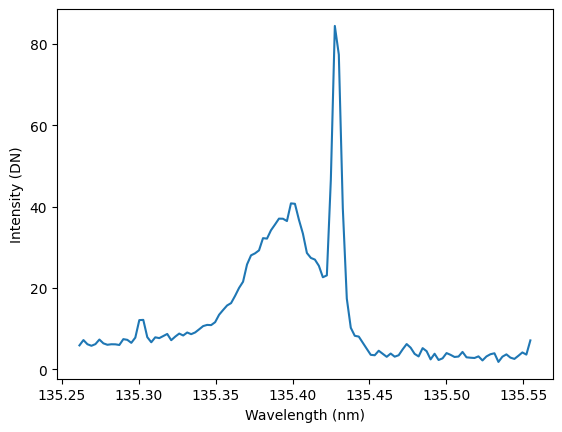

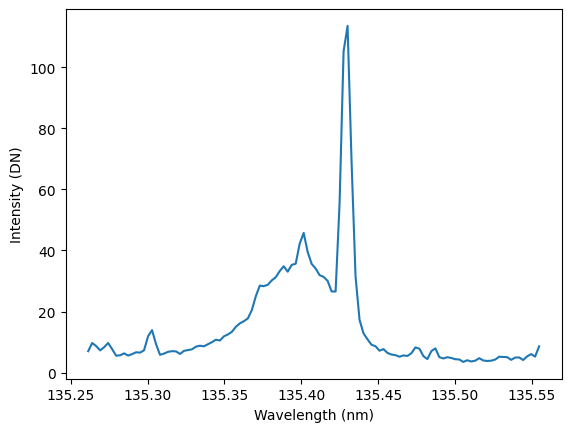

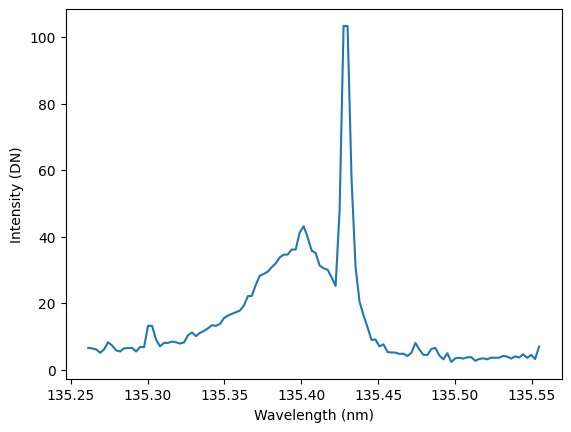

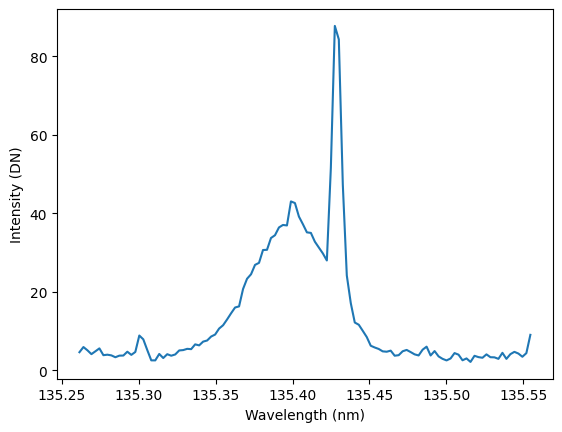

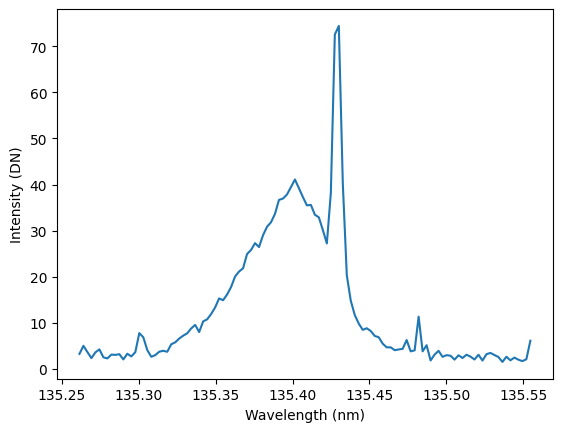

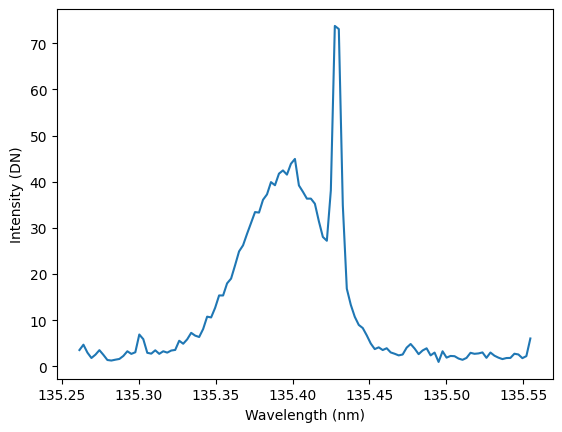

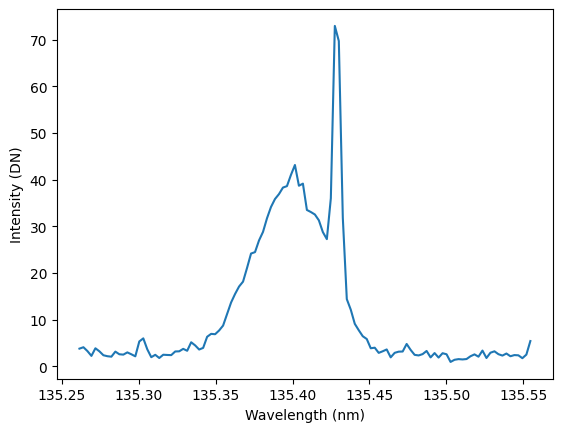

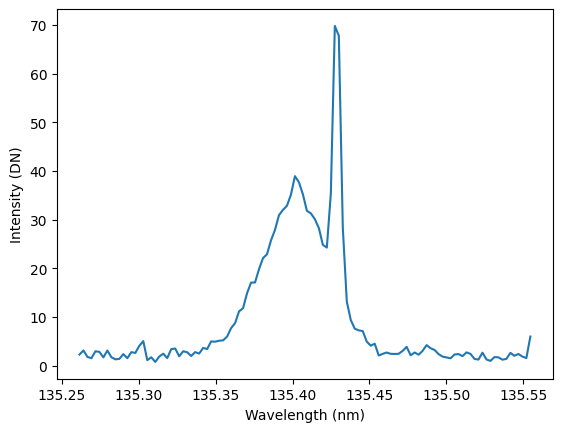

In [ ]:
for j in range(10):
    data_5=spectrum_data_array[j,5,790:820,:].mean((0))
    #data_5=o1.data[5,790:820,14:128].mean((0))
    plt.plot(wavelength[14:128],data_5[14:128])
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity (DN)")
    #plt.title(hdr1['DATE_OBS'])
    plt.show()


# **FeXXI Line analysis**

# **Fitting the Spectrum**

In [ ]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [ ]:
#sp=o1_all[15+j].data[5,790:820,14:128].mean((0))
sp=spectrum_data_array[0,5,790:820,:].mean((0))
sp=sp-np.min(sp)
#sp+32000
sp

array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
       205.33333, 204.74167, 206.50833, 209.1    , 208.21666, 206.65   ,
       207.85834, 209.05833, 207.36667, 206.09166, 206.68333, 207.00833,
       205.99167, 206.03334, 206.775  , 207.3    , 208.85   , 212.69167,
       214.60834, 210.33333, 207.99167, 208.45833, 208.3    , 208.44167,
       208.80833, 208.94167, 209.49167, 209.38333, 211.16667, 212.075  ,
       212.69167, 213.20833, 213.45   , 214.18333, 215.00833, 217.10834,
       217.975  , 220.55833, 222.675  , 222.51666, 223.575  , 226.075  ,
       228.79167, 231.275  , 234.30833, 237.5    , 239.28333, 239.90833,
       242.10834, 244.025  , 244.7    , 247.34167, 249.44167, 248.21667,
       249.05   , 254.38333, 256.975  , 250.2    , 246.6    , 242.73334,
       241.25833, 241.91667, 239.46667, 235.95833, 235.06667, 260.45834,
       300.35   , 307.49167, 276.19165, 243.50833, 

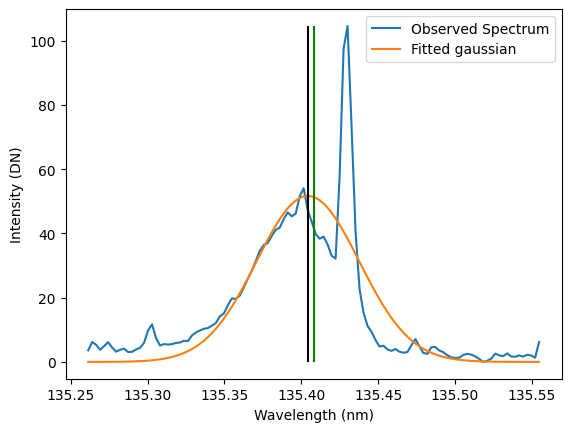

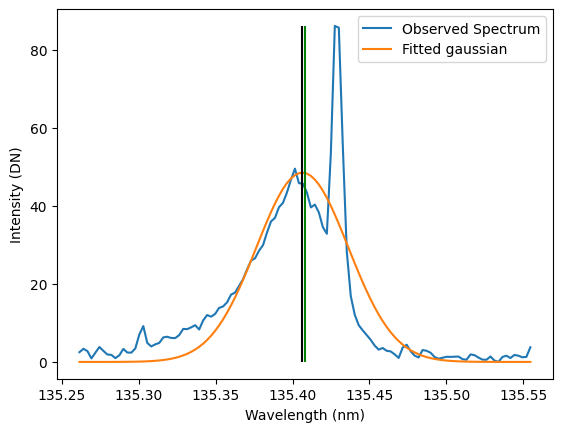

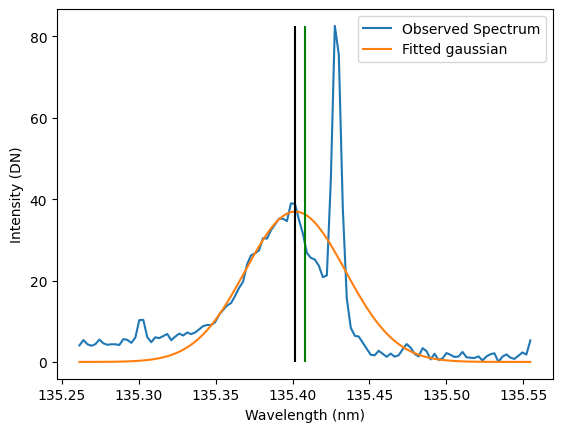

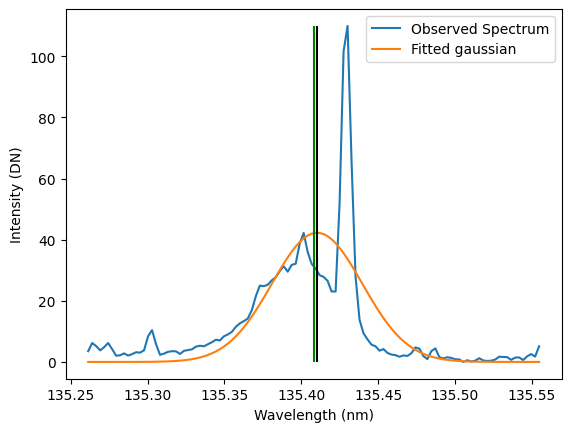

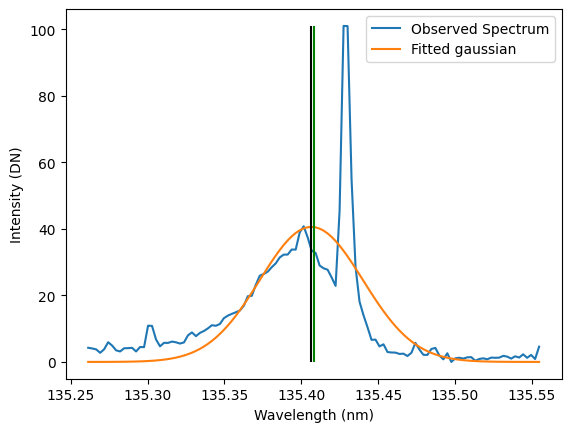

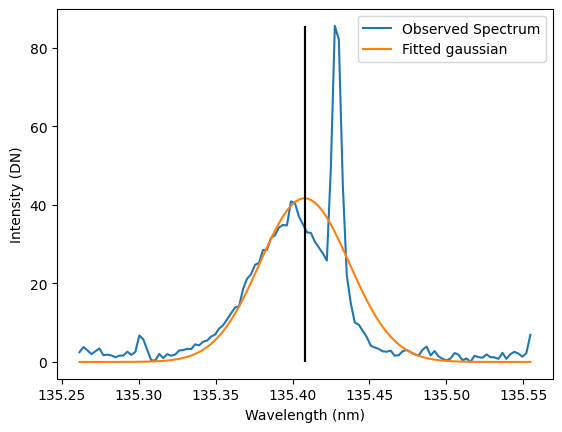

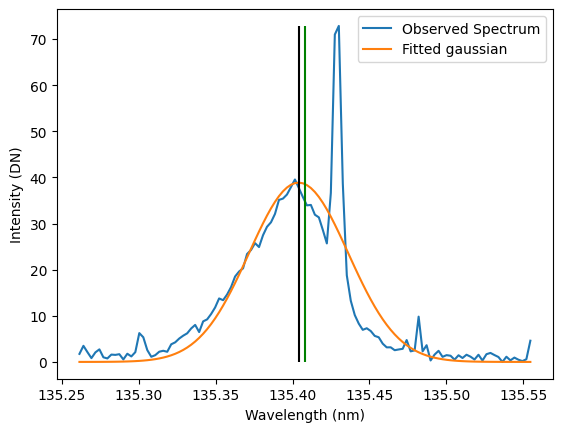

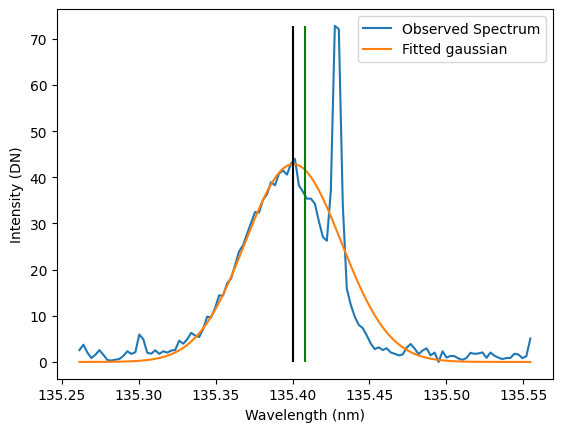

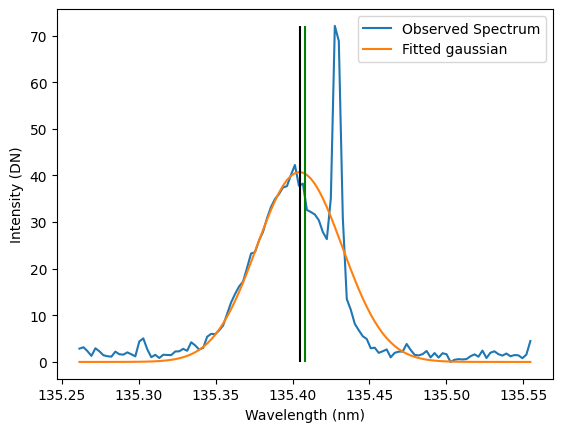

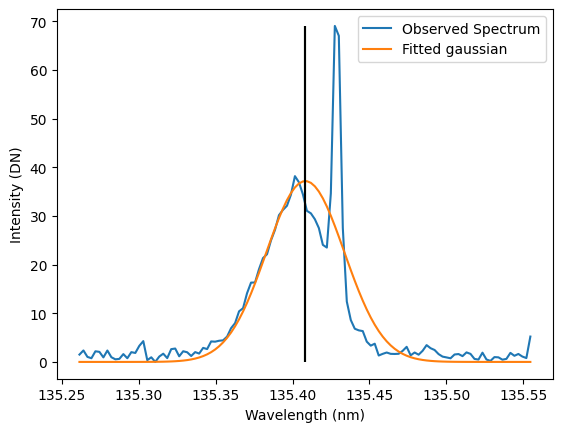

In [ ]:

wvl = np.asarray(wavelength[14:128])
#s = (10,3)
#c1 = np.zeros(s)
wvl_rest = 135.408
for j in range(10):
  #raster = read_files(raster_files[15+j], memmap=False)
  #o1 = raster["O I 1356"][0]
  #sp = o1.data[5,790:820,14:128].mean((0))
  sp=spectrum_data_array[j,5,790:820,14:128].mean((0))
  sp=sp - np.min(sp)
  #sp = box_data_avg[j,:]
  # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
  p = [500., 135.4, 0.1]
  coeff, var_matrix = curve_fit(gauss, wvl, sp, p0=p)
  #c1[j,:] = coeff
  # Get the fitted curve
  sp_fit = gauss(wvl, *coeff)
  #hdr1 = extract_irisL2data.only_header(raster_files[j+15])
  plt.plot(wvl, sp, label='Observed Spectrum')
  plt.plot(wvl, sp_fit, label='Fitted gaussian')
  plt.vlines(wvl_rest,ymin=0, ymax =np.amax(sp),colors = 'green')  #vertical lines plot
  plt.vlines(coeff[1],ymin=0, ymax =np.amax(sp),colors = 'black')
  plt.legend()
  #plt.title(hdr1['DATE_OBS'])
  plt.xlabel("Wavelength (nm)")
  plt.ylabel("Intensity (DN)")
  # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
  #print('Fitted mean = ', coeff[1])
  #print('Fitted standard deviation = ', coeff[2])

  plt.show()


**Highlighting the blending**

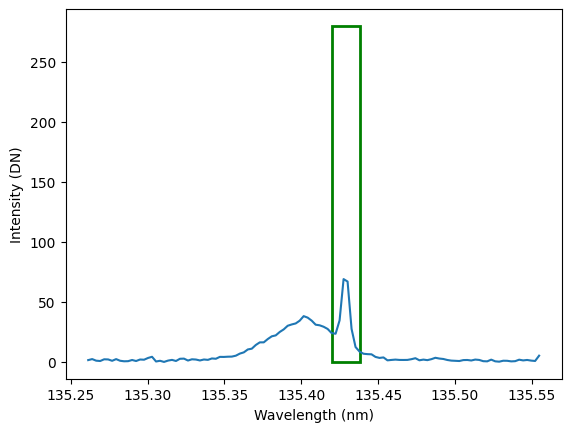

In [ ]:
#box_data1 = data_5[15,700:840,14:125]
#box_data_avg1 = np.average(box_data,axis=0)
fig, ax = plt.subplots(1)
ax.plot(wvl,sp)
rect = patches.Rectangle((135.42,0),0.018,280, edgecolor='g',linewidth=2, facecolor="none")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
ax.add_patch(rect)
plt.show()

**Removing The Blending**

In [ ]:
wvl[75:83]
wvl.shape

(114,)

In [ ]:
wvl = np.asarray(wavelength[14:128])
wave = np.concatenate((wvl[0:61],wvl[70:114]),axis=None)
print(np.shape(wave))
print(wvl.shape)
data = []
for j in range(10):
  sp=spectrum_data_array[j,5,790:820,14:128].mean((0))
  sp=sp - np.min(sp)
  e,f = sp[0:61],sp[70:114]
  d = np.concatenate((e,f),axis=None)
  data.append(d)
  #print(np.shape(d))
print(np.shape(data))

(105,)
(114,)
(10, 105)


Fitted mean =  135.39543018015056
Fitted standard deviation =  0.03109333458059877


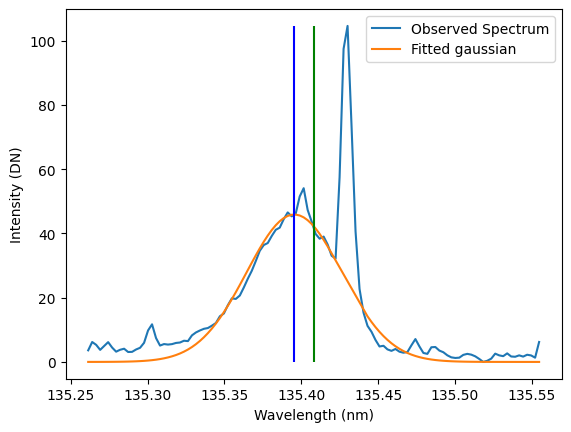

Fitted mean =  135.39955061962198
Fitted standard deviation =  0.029270520589173527


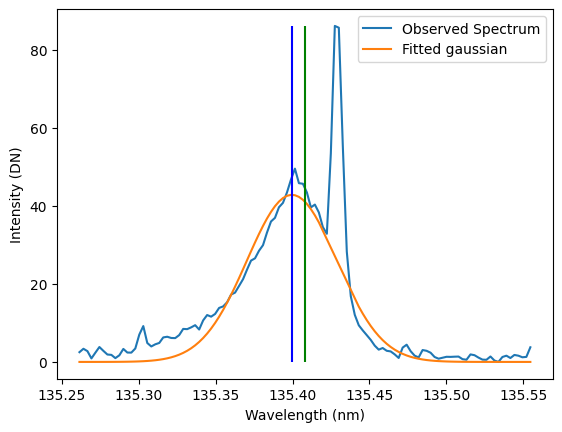

Fitted mean =  135.39378325144008
Fitted standard deviation =  0.02930483355650207


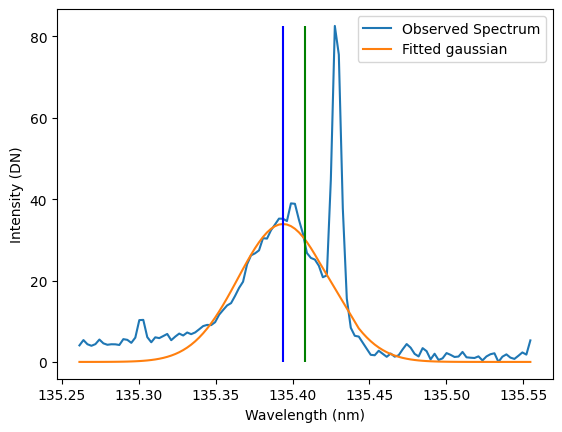

Fitted mean =  135.3979939841324
Fitted standard deviation =  0.028199600962412013


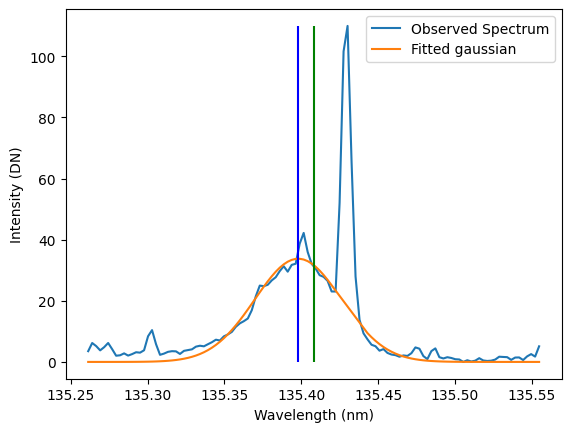

Fitted mean =  135.3954718238604
Fitted standard deviation =  0.033498076274191


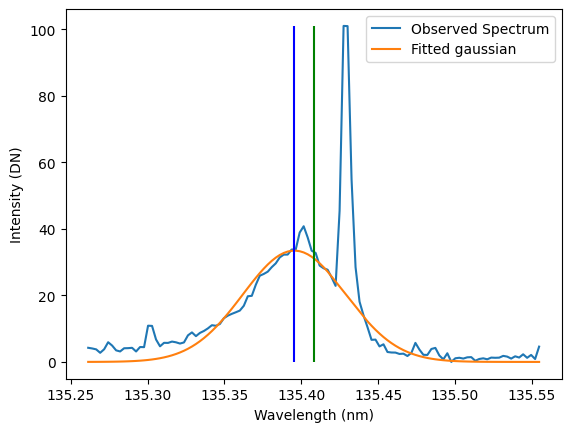

Fitted mean =  135.39951672161618
Fitted standard deviation =  0.027157664774327708


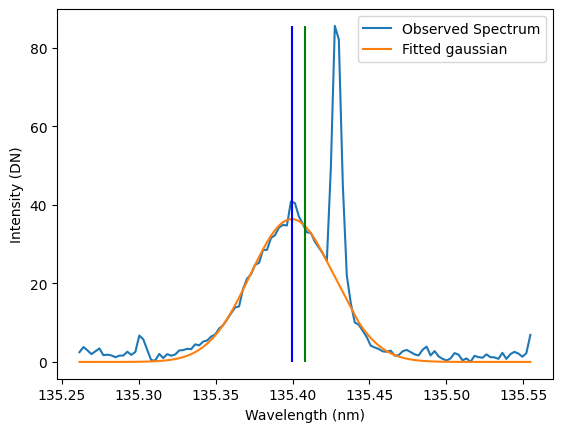

Fitted mean =  135.3981423836332
Fitted standard deviation =  0.03133501648607594


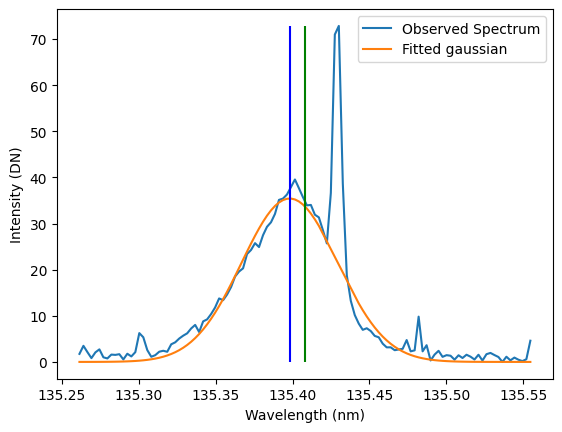

Fitted mean =  135.39512106945955
Fitted standard deviation =  0.02853313177706947


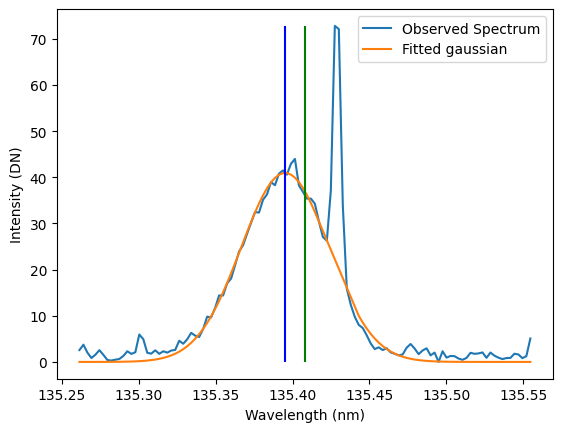

Fitted mean =  135.39882185821412
Fitted standard deviation =  0.025311388381688303


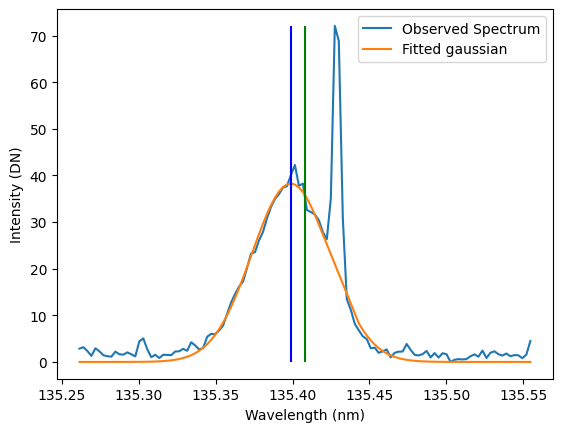

Fitted mean =  135.40263770023057
Fitted standard deviation =  0.023538301484441977


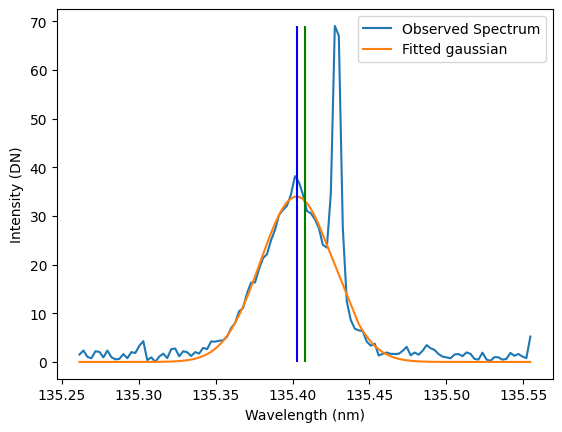

In [ ]:

wvl = wave
wvl_pre = np.asarray(wavelength[14:128])
s = (10,3)
c1 = np.zeros(s)

for j in range(10):
  sp = data[j] # unblended data
  sp1 = spectrum_data_array[j,5,790:820,14:128].mean((0))
  sp_pre=sp1 - np.min(sp1)
  #sp_pre = box_data_avg[j,:]
  # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
  p = [500., 135.4, 0.1]

  coeff, var_matrix = curve_fit(gauss, wvl, sp, p0=p)
  c1[j,:] = coeff
  # Get the fitted curve
  sp_fit = gauss(wvl, *coeff)
  #hdr1 = extract_irisL2data.only_header(raster_files[j+15])
  plt.plot(wvl_pre, sp_pre, label='Observed Spectrum')
  plt.plot(wvl, sp_fit, label='Fitted gaussian')
  plt.vlines(wvl_rest,ymin=0, ymax =np.amax(sp_pre),colors = 'green')  #vertical lines plot
  plt.vlines(coeff[1],ymin=0, ymax =np.amax(sp_pre),colors = 'blue')
  plt.legend()
  #plt.title(hdr1['DATE_OBS'])
  plt.xlabel("Wavelength (nm)")
  plt.ylabel("Intensity (DN)")
  # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
  print('Fitted mean = ', coeff[1])
  print('Fitted standard deviation = ', coeff[2])

  plt.show()

**Double Gaussian fitting**

In [ ]:
def gauss2(x, *p):
    c= p[0:3]
    d=p[3:6]
    A1, mu1, sigma1 = c
    A2, mu2, sigma2 = d
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2))+A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

(114,)
27.961900197606408 135.40412566067926 0.021957461793128828 56.2136262997537 135.42874193732595 0.002274968314738776
Fitted mean =  135.40412566067926
Fitted standard deviation =  0.021957461793128828


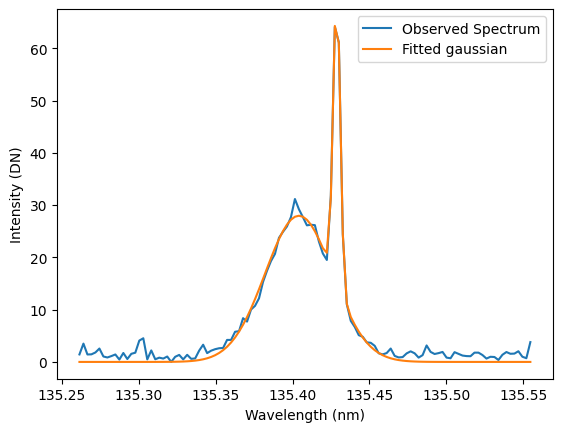

In [ ]:
wvl = np.asarray(wavelength[14:128])
sp = sp=spectrum_data_array[10,5,790:820,14:128].mean((0))
sp = sp- np.min(sp)
print(np.shape(sp))
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p1 = [15., 135.40, 0.1,25,135.44,0.02] # initial guess for 15
#p1 = [15,135.44,0.02,5., 135.40, 0.1] #initial guess for 18
coeff, var_matrix = curve_fit(gauss2, wvl, sp, p0=p1)
print(*coeff)
# Get the fitted curve
sp_fit = gauss2(wvl, *coeff)
plt.plot(wvl, sp, label='Observed Spectrum')
plt.plot(wvl, sp_fit, label='Fitted gaussian')
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

# plt.show()

# **Determining The Spectral parameters**

# **Doppler Shift**

In [ ]:
wvl_rest = 135.408 #rest wavelength (We have taken this rest wavelength from the paper (Polito et al 2014)) for line FeXXI
c = 3e+5
v = []
ampl=[]
wd=[]
for j in range(10):
  wvl_sft = c1[j,1]
  #print(wvl_sft)
  v.append(((wvl_sft-wvl_rest)/wvl_rest) *c)
  ampl.append(c1[j,0])
  lw=c1[j,2]
  wd.append((lw/wvl_rest)*c)
print('Doppler Velocity = ',v) # in unit of Km/s
print('Amplitude = ',ampl)
print('Width (in km/s) = ',wd)

Doppler Velocity =  [np.float64(-27.848767833729067), np.float64(-18.719825367800812), np.float64(-31.497581885641576), np.float64(-22.168592404264356), np.float64(-27.7565050948174), np.float64(-18.794927294857082), np.float64(-21.839809391144918), np.float64(-28.533610732980783), np.float64(-20.334415512821156), np.float64(-11.880316752517432)]
Amplitude =  [np.float64(45.876823946432374), np.float64(42.857439883125195), np.float64(33.903701992919125), np.float64(33.77528231621864), np.float64(33.46931786644463), np.float64(36.4156106009421), np.float64(35.43569945993078), np.float64(40.957794643452345), np.float64(38.24734472819028), np.float64(33.98143747530859)]
Width (in km/s) =  [np.float64(68.88810390951518), np.float64(64.84961137268152), np.float64(64.92563265797162), np.float64(62.476960657594866), np.float64(74.21587263867201), np.float64(60.168523516323354), np.float64(69.42355655369536), np.float64(63.21590698570869), np.float64(56.07804940997941), np.float64(52.149728563

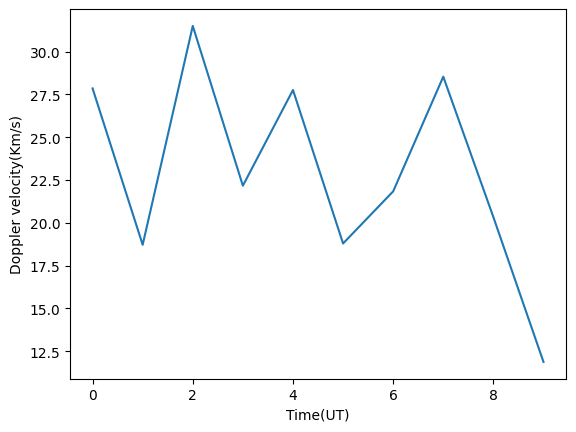

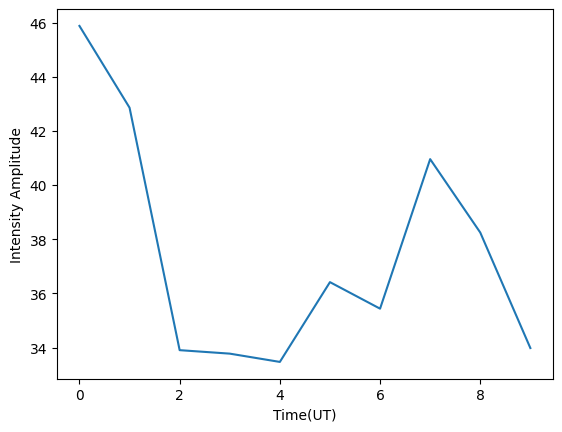

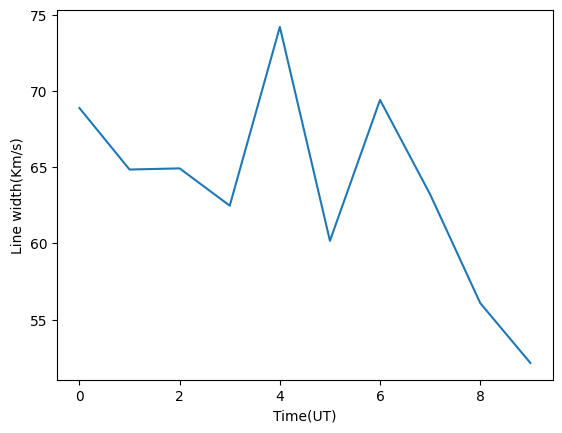

In [ ]:
time = np.arange(10)
#for j in range(10):
#  hdr1 = extract_irisL2data.only_header(raster_files[j+15])
#  time.append(hdr1['DATE_OBS'][11:16])

plt.plot(time,np.abs(v))
plt.xlabel("Time(UT)")
plt.ylabel("Doppler velocity(Km/s)")
plt.show()

plt.plot(time,np.abs(ampl))
plt.xlabel("Time(UT)")
plt.ylabel("Intensity Amplitude")
plt.show()

plt.plot(time,np.abs(wd))
plt.xlabel("Time(UT)")
plt.ylabel("Line width(Km/s)")
plt.show()